In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats
from PIL import Image

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

In [2]:
def gamma(a : int = 0, b : int = 0):
        
    if a + b == 1/2:
        return math.pi ** 0.5
    else:
        return math.factorial(a + b - 1)    
    
def beta(a : int , b : int):
    
    x = np.linspace(0,1,500)
    
    C = gamma(a, b) / gamma(a) / gamma(b)
    
    fx = (x)**(a - 1) * (1-x) ** (b - 1)
    
    return  fx * C   

Text(0.5, 0.98, '베타 분포는 0과 1 사이에서 값을 갖는 확률 분포 \n 모수인 a,b 값에 따라 분포의 모양이 변한다')

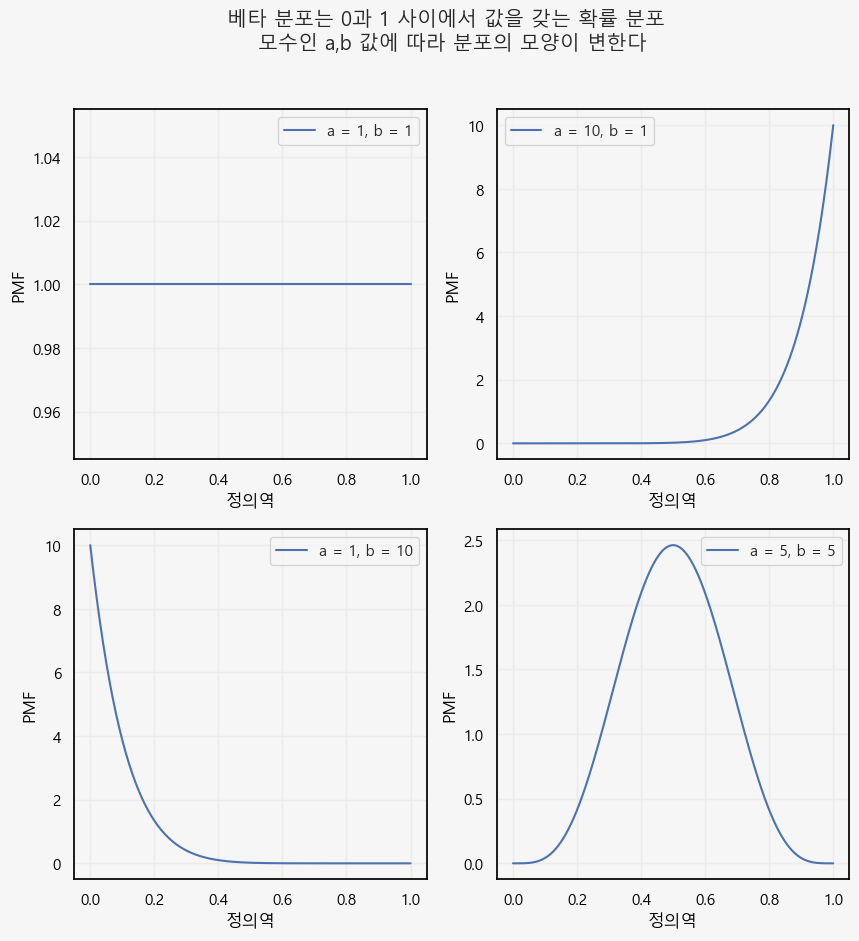

In [22]:
X = np.linspace(0,1,500)

fig,ax = plt.subplots(ncols = 2, nrows = 2 ,figsize = (10,10))

ax = ax.flatten()

for i,(a,b) in enumerate([(1,1),(10,1),(1,10),(5,5)]):
    
    ax[i].plot(X,beta(a,b), label = f'a = {a}, b = {b}')
    ax[i].set_xlabel('정의역')
    ax[i].set_ylabel('PMF')
    ax[i].legend()
    
    
fig.suptitle('베타 분포는 0과 1 사이에서 값을 갖는 확률 분포 \n 모수인 a,b 값에 따라 분포의 모양이 변한다')

Text(0.5, 1.1, '다음 시행에서 성공할 확률은 해당 베타 분포의 기대값')

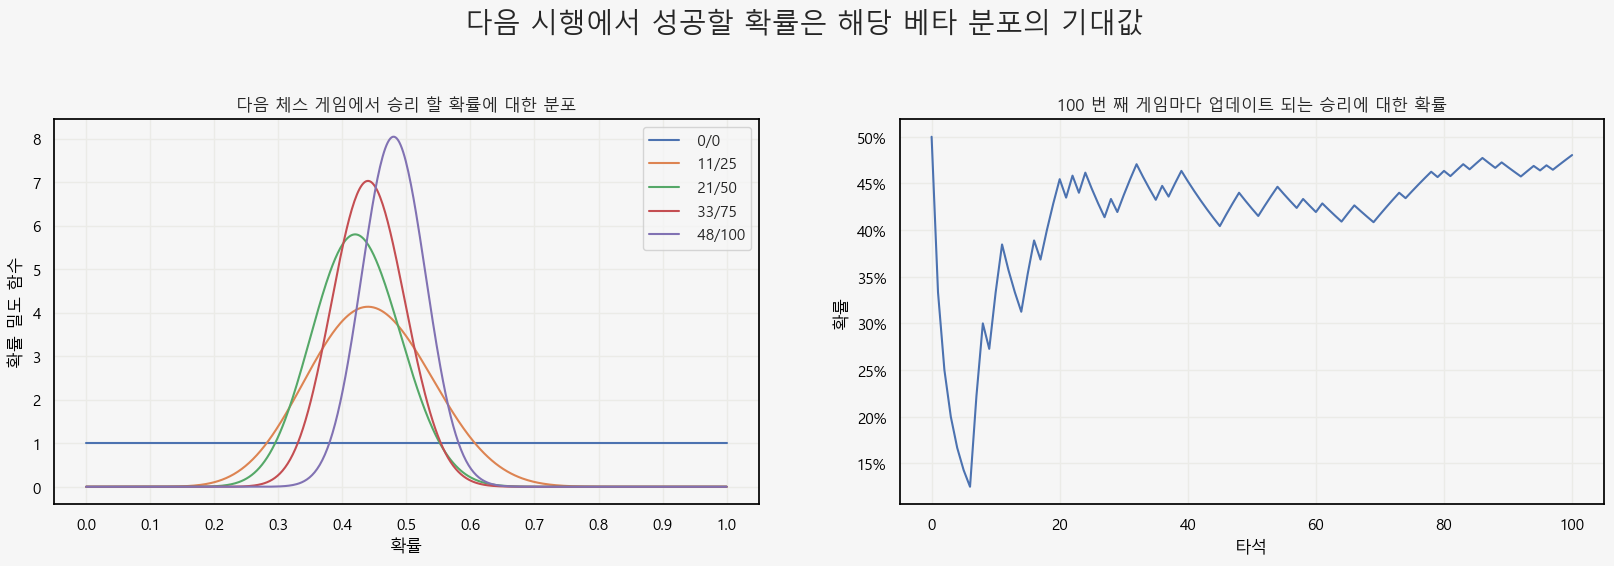

In [36]:
success, failure = 1,1
trial = 100

X = np.linspace(0,1,500)

fig,ax = plt.subplots(ncols = 2,figsize = (20,5))

prior_list = []

for _ in range(trial + 1):
    
    prior = success / (success + failure)  
    prior_list.append(prior)
    
    pdf = beta(success,failure)
    
    
    if _ % 25 == 0 :
        
        ax[0].plot(X,pdf, label = f' {success - 1}/{_}')
                
    event = np.random.uniform()
    
    if event > prior:
        failure += 1
    else:
        success += 1        
        

ax[0].legend()
ax[0].set_xticks(np.arange(0,1.1,0.1));
ax[0].set_title('다음 체스 게임에서 승리 할 확률에 대한 분포')
ax[0].set_xlabel('확률')
ax[0].set_ylabel('확률 밀도 함수')

ax[1].plot(prior_list)
ax[1].set_title(f'{trial} 번 째 게임마다 업데이트 되는 승리에 대한 확률')
ax[1].set_xlabel('타석')
ax[1].set_ylabel('확률') 
ax[1].set_yticklabels(
    [str(round(tick * 100)) + '%' for tick in ax[1].get_yticks()]
)


fig.suptitle('다음 시행에서 성공할 확률은 해당 베타 분포의 기대값', y = 1.1,
            fontsize = 20)